<a href="https://colab.research.google.com/github/zShadil/GIT-Assignment/blob/main/Unsupervised_Case_Study4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

from sklearn.cluster import AgglomerativeClustering


In [4]:
#Replace with your actual file path
data = pd.read_csv("adult_dataset.csv")
#Quick look
print(data.shape)
data.head()

(48842, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40.0,NaN,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


# 3. Data Cleaning

In [5]:
#Replace '?' with NaN
data.replace('?', np.nan, inplace=True)

# Fill missing values
for col in data.select_dtypes(include='object').columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

for col in data.select_dtypes(include=['int64','float64']).columns:
    data[col].fillna(data[col].median(), inplace=True)

# Check missing values
data.isnull().sum()

/tmp/ipython-input-3425175039.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
/tmp/ipython-input-3425175039.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


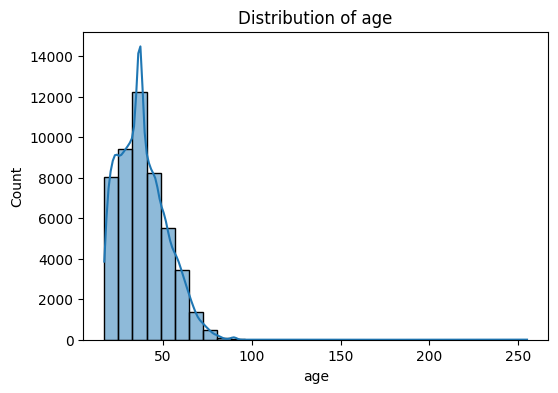

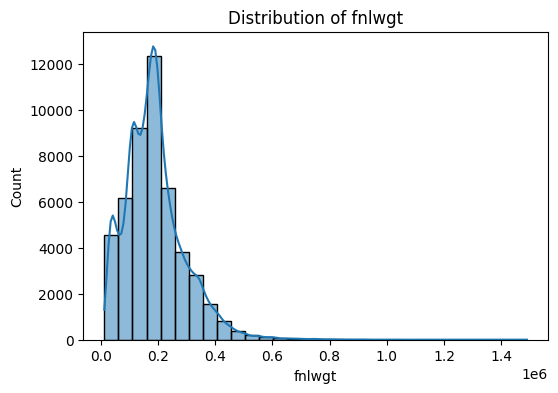

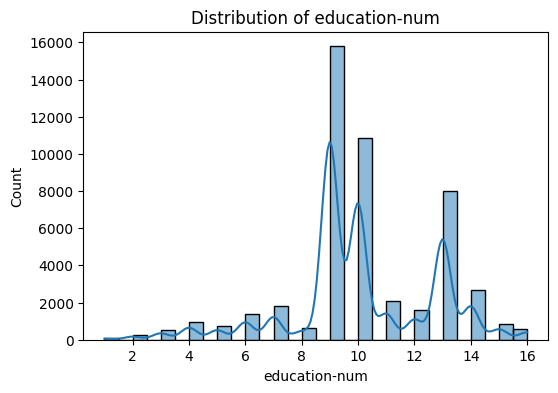

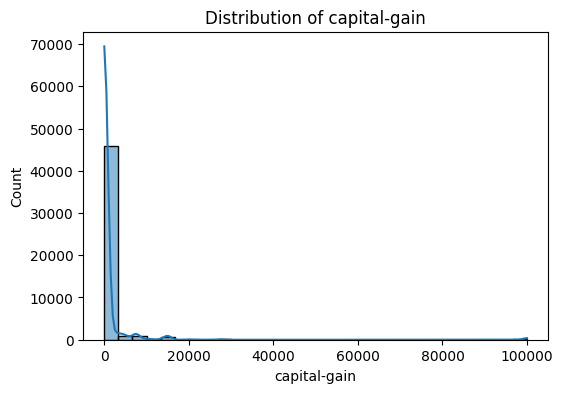

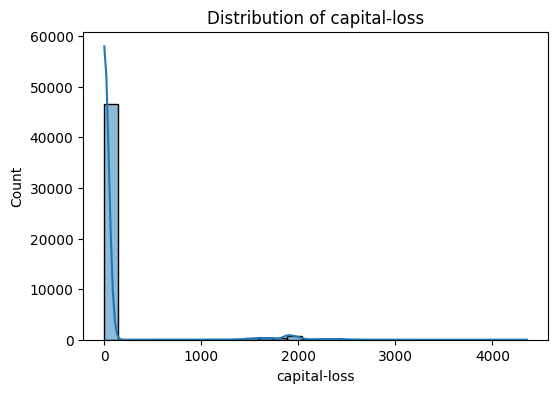

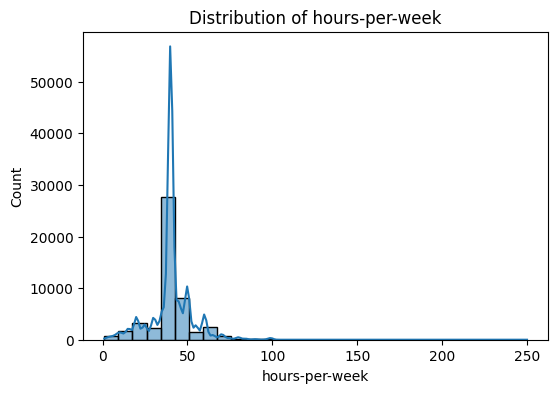

In [6]:
#4. Plot Histograms + KDE
num_cols = data.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

 5. Outlier Detection (IQR method) for all numerical features

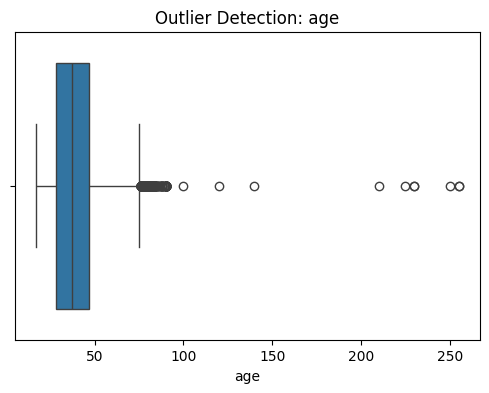

age: 364 outliers detected


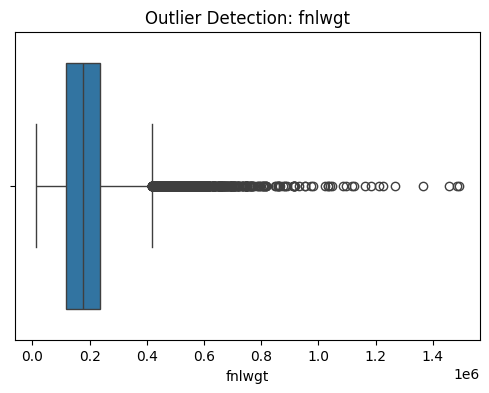

fnlwgt: 1453 outliers detected


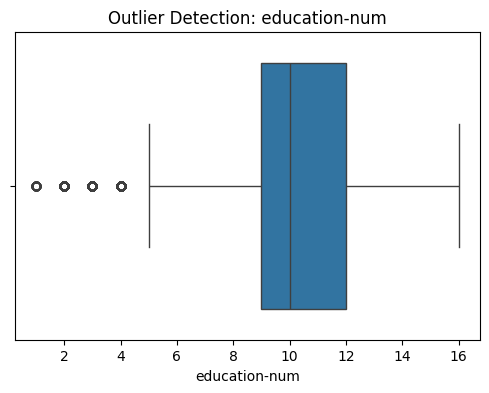

education-num: 1794 outliers detected


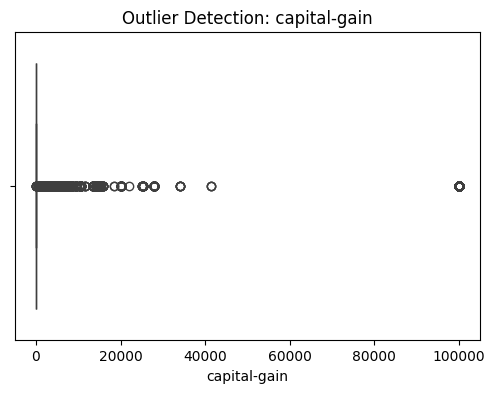

capital-gain: 4035 outliers detected


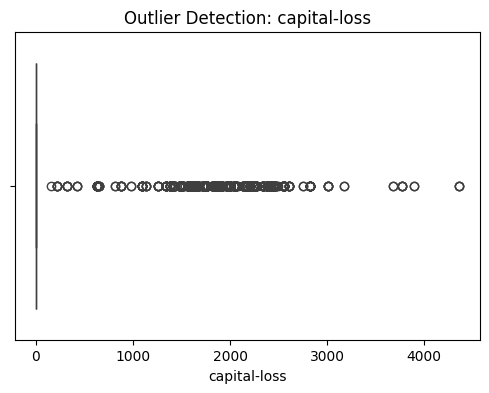

capital-loss: 2282 outliers detected


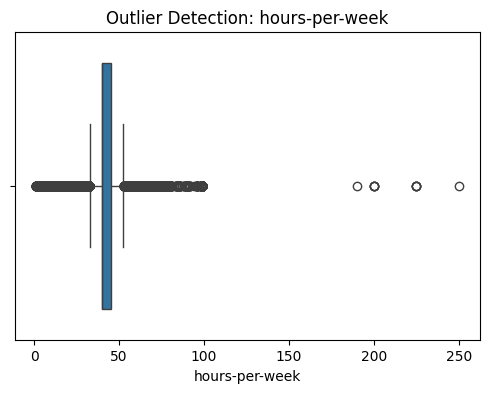

hours-per-week: 12838 outliers detected


{'age': 364,
 'fnlwgt': 1453,
 'education-num': 1794,
 'capital-gain': 4035,
 'capital-loss': 2282,
 'hours-per-week': 12838}

In [7]:
#Select numerical columns
num_cols = data.select_dtypes(include=['int64','float64']).columns

outlier_summary = {}

for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
    outlier_summary[col] = len(outliers)

    # Plot boxplot
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col])
    plt.title(f"Outlier Detection: {col}")
    plt.show()

    print(f"{col}: {len(outliers)} outliers detected")

# Summary of outliers
outlier_summary

#6. IQR-based removal for all numerical features

In [8]:
num_cols = data.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

In [9]:
data


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K
5,37.0,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,<=50K
7,52.0,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45.0,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48835,48.0,Local-gov,349230,Masters,14,Divorced,Other-service,Not-in-family,White,Male,0,0,40.0,United-States,<=50K.
48836,33.0,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40.0,United-States,<=50K.
48837,39.0,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36.0,United-States,<=50K.
48838,64.0,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40.0,United-States,<=50K.


#7.Visualise Feature Distribution

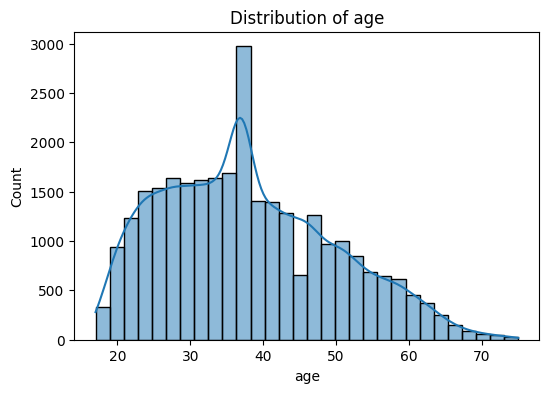

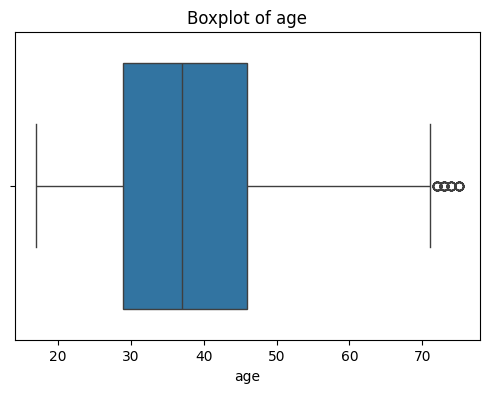

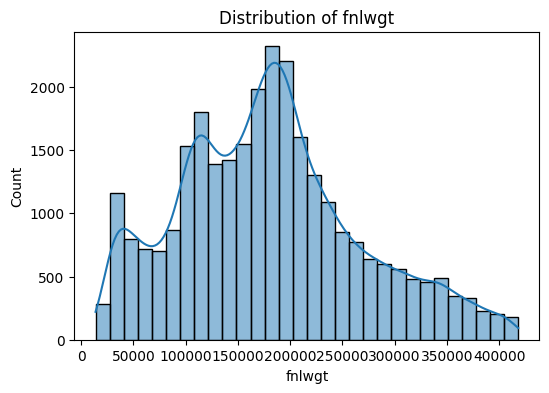

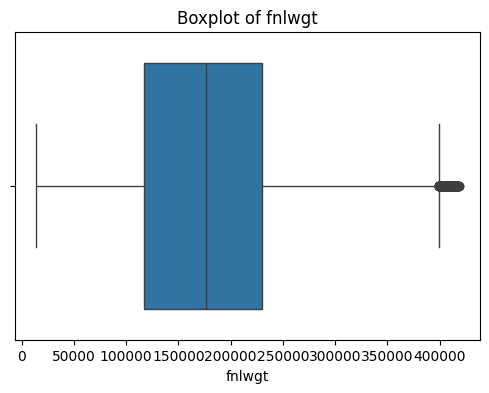

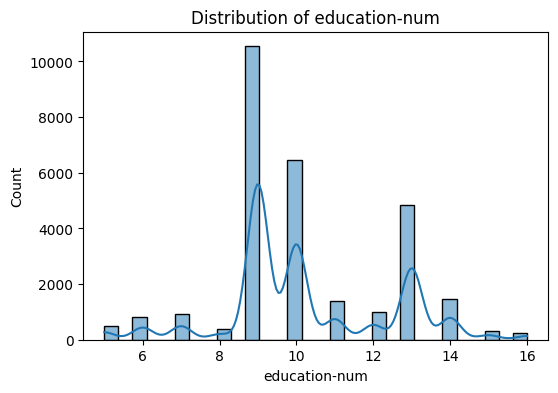

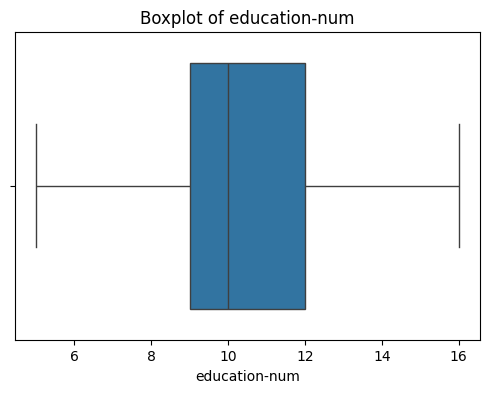

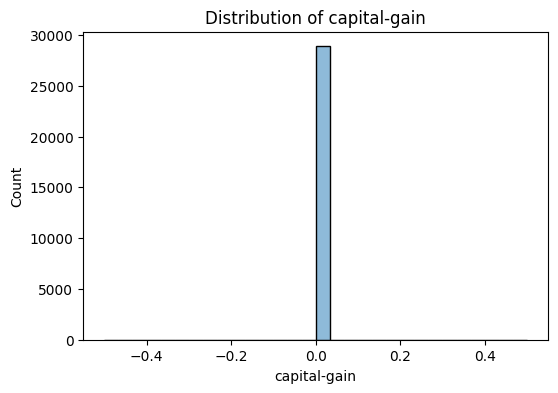

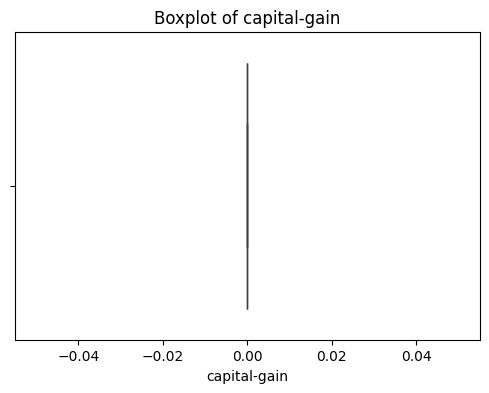

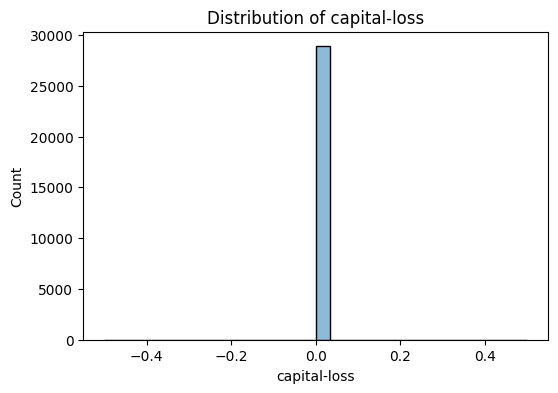

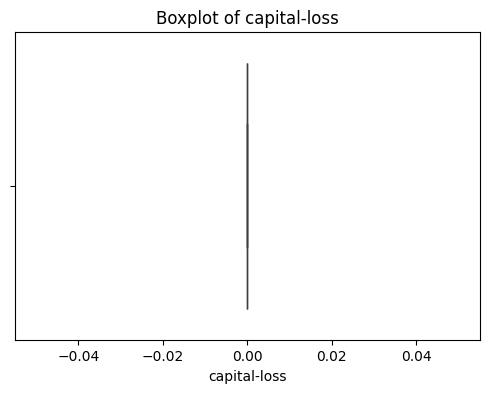

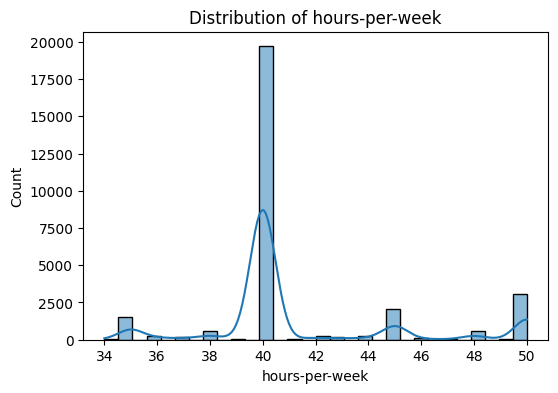

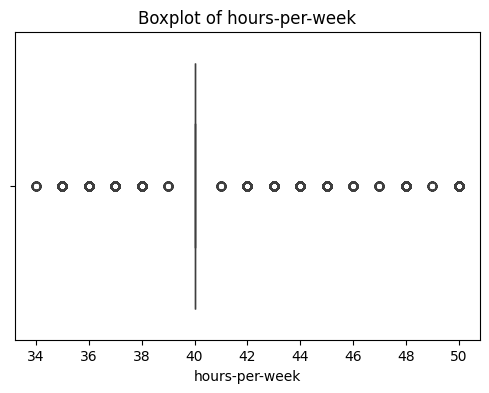

In [10]:
num_cols = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

#8. Correlation Analysis

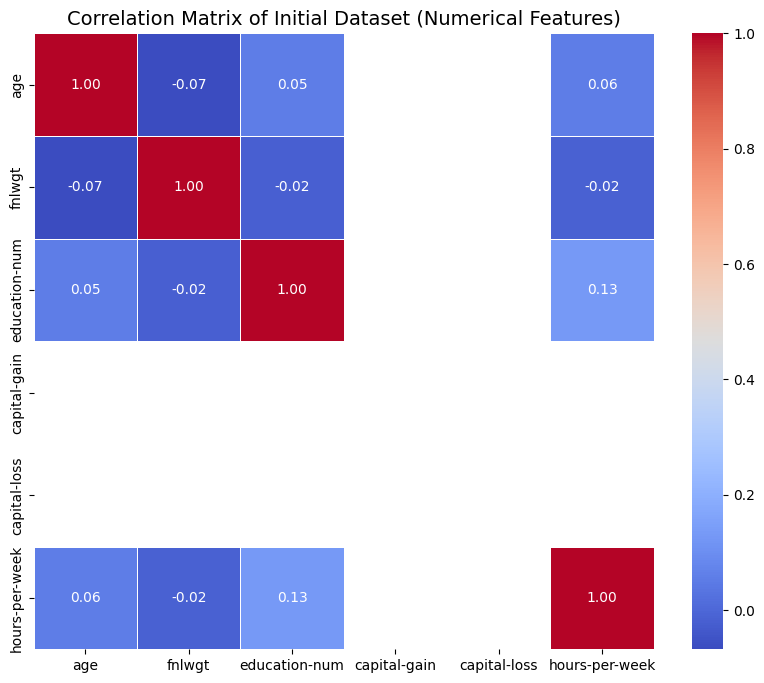

In [11]:

num_cols = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
corr_matrix = data[num_cols].corr(method='pearson')

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Initial Dataset (Numerical Features)", fontsize=14)
plt.show()

#9. Drop columns after analysis

In [12]:
#Separate target
y = data['income']
data = data.drop(columns=['income','fnlwgt','education'])  # drop redundant and negative correlation features



#10. One-hot encode categorical

In [13]:
cat_cols = ['workclass','occupation','marital-status','relationship',
            'race','sex','native-country']
data_encoded = pd.get_dummies(data, columns=cat_cols, drop_first=True).astype(int)


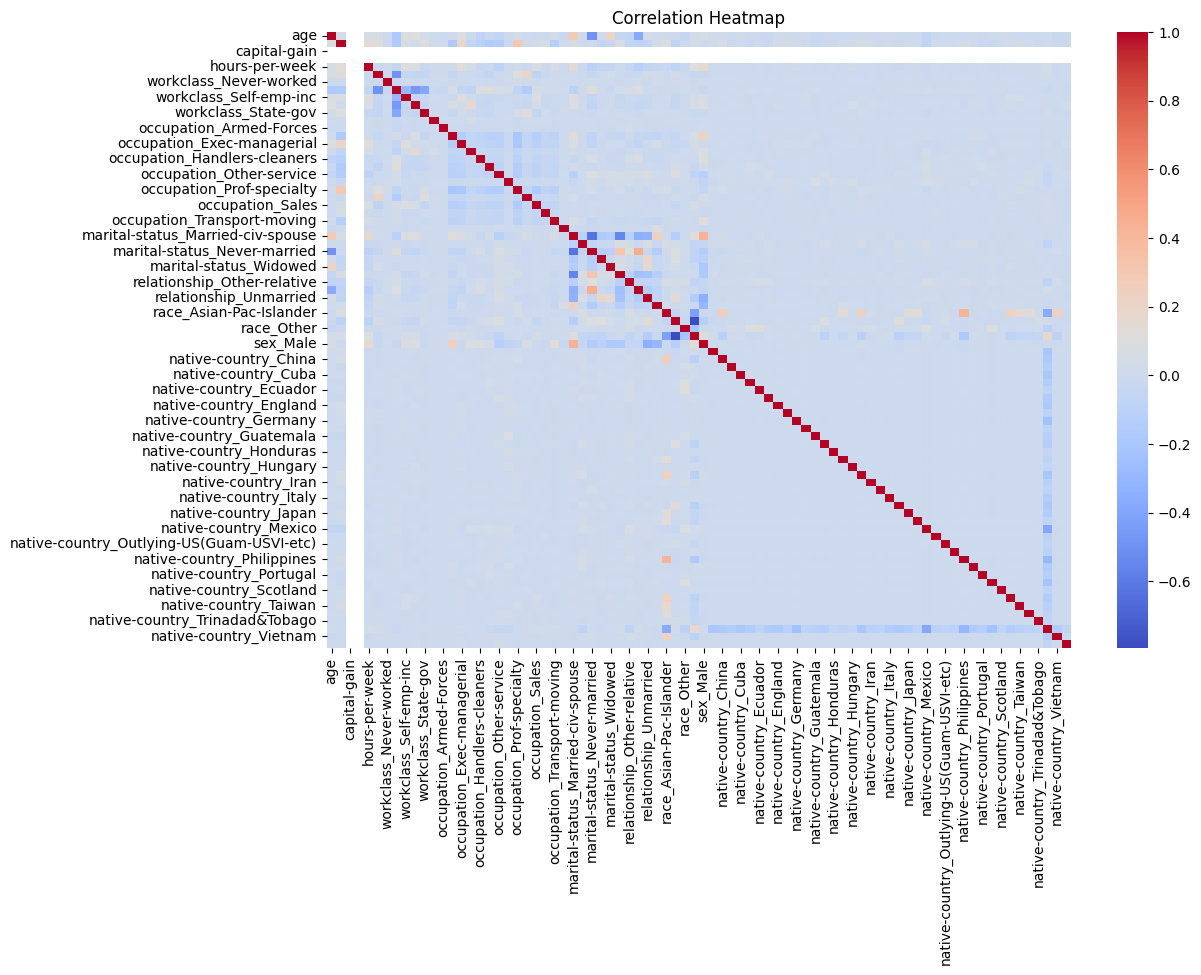

In [14]:

plt.figure(figsize=(12,8))
sns.heatmap(data_encoded.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

10. Scale numerical + encoded features

In [15]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)
data_scaled


array([[ 0.00873275, -0.57775707,  0.        , ...,  0.27813521,
        -0.04246824, -0.01951868],
       [ 1.27880719, -1.50768018,  0.        , ...,  0.27813521,
        -0.04246824, -0.01951868],
       [-0.83798354,  1.28208915,  0.        , ..., -3.59537365,
        -0.04246824, -0.01951868],
       ...,
       [ 0.09340438,  1.28208915,  0.        , ...,  0.27813521,
        -0.04246824, -0.01951868],
       [ 2.21019511, -0.57775707,  0.        , ...,  0.27813521,
        -0.04246824, -0.01951868],
       [ 0.00873275,  1.28208915,  0.        , ...,  0.27813521,
        -0.04246824, -0.01951868]])

#11. Feature reduction using PC

In [16]:
from sklearn.decomposition import PCA
pca = PCA().fit(data_scaled)
explained_variance = pca.explained_variance_ratio_
import numpy as np
cum_var = np.cumsum(explained_variance)
print(cum_var)

[0.03834611 0.07013631 0.09717994 0.1218311  0.14329694 0.16364365
 0.18210942 0.19936022 0.21614154 0.23166279 0.24687458 0.26196577
 0.27642106 0.29065842 0.30482636 0.31887389 0.33288405 0.34664564
 0.36036262 0.37394278 0.38740945 0.40076304 0.41391073 0.42700178
 0.44007738 0.4530483  0.46593776 0.47881537 0.49168697 0.50454759
 0.51740384 0.53025429 0.54310035 0.55594526 0.56878526 0.58162416
 0.59446256 0.6072981  0.62013197 0.63296418 0.64579615 0.65862672
 0.67145279 0.68427769 0.69708628 0.70987977 0.72266187 0.73543725
 0.74817486 0.76090916 0.77361401 0.78631083 0.7989203  0.81150944
 0.82404261 0.83654782 0.84885905 0.86101388 0.87300605 0.88495261
 0.89672253 0.90828745 0.91978647 0.93087693 0.94154351 0.95167
 0.96154262 0.97093752 0.97824358 0.98495025 0.98971083 0.99384283
 0.99660982 0.9982809  0.99930996 0.99981985 0.9999404  1.
 1.         1.        ]


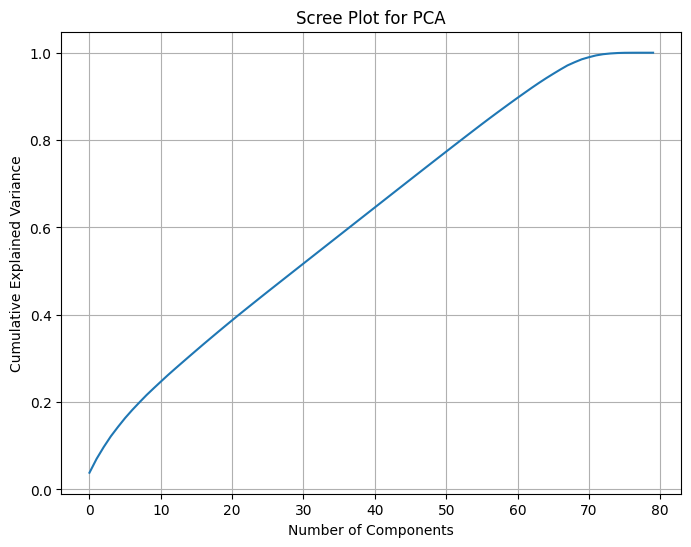

In [17]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot for PCA')
plt.grid(True)
plt.show()

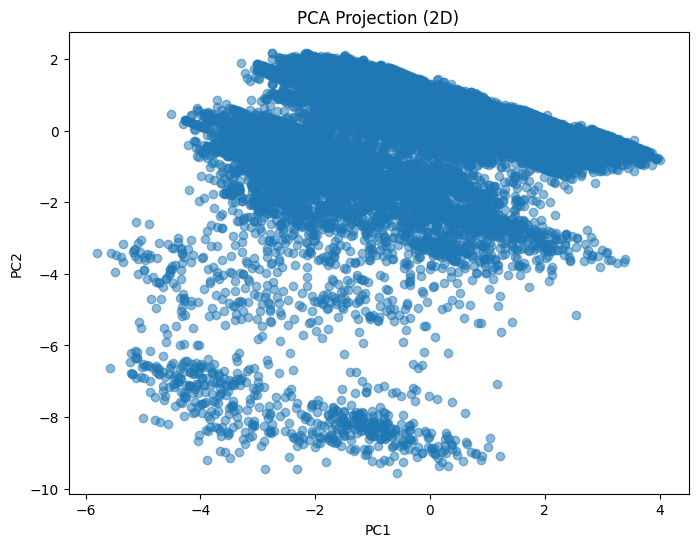

In [18]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.5)
plt.title("PCA Projection (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [19]:
# Example: keep enough components for 90% variance
pca = PCA(n_components=0.90)  # automatically chooses components
data_pca = pca.fit_transform(data_scaled)

# Convert to DataFrame

In [20]:
pca_df = pd.DataFrame(
    data_pca,
    columns=[f'PC{i+1}' for i in range(data_pca.shape[1])]
)

# Print first few rows
print(pca_df.head())


        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.432721  1.148432  0.940350 -0.131121 -0.076136 -0.053085 -0.850910   
1 -0.289656 -1.082375  0.720421 -3.112497  2.402924  0.779856 -0.266086   
2 -1.126697 -4.529125 -0.262823 -0.322299 -1.578397 -0.302371  4.504865   
3  1.474615 -0.417934 -0.784734 -0.078439 -1.744536  2.248689  2.704253   
4  3.202235 -0.469322 -0.777244  0.273665  0.555155 -1.206149 -1.451498   

        PC8       PC9      PC10  ...      PC53      PC54      PC55      PC56  \
0  0.808799 -0.866075 -0.850461  ... -0.146005  1.797919  0.629699  1.300663   
1  1.275402  0.412981 -0.441399  ... -0.317323  1.789893  0.591940  1.356929   
2  1.305771  2.708058  0.224649  ...  2.853026  0.342921  1.636501  0.966188   
3 -0.850598  1.998939 -1.244512  ...  0.261113  0.101191 -0.136997 -0.493715   
4 -1.278895  1.739375  0.035540  ... -0.254280  0.233467 -0.300272 -0.296455   

       PC57      PC58      PC59      PC60      PC61      PC62  
0 -0

#Clustering

#KMeans++

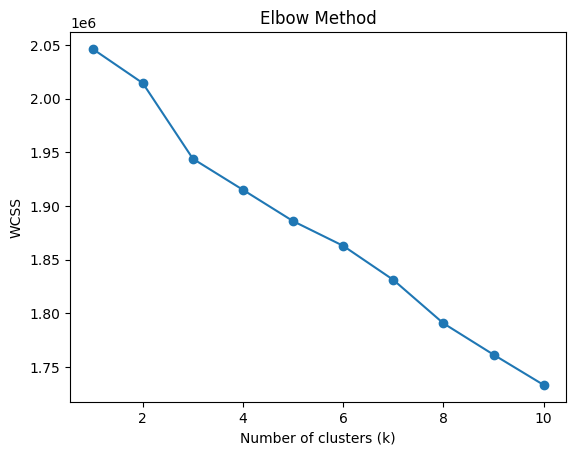

In [25]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_pca)   # or X_scaled
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

- High Dimensionality (80+ features after encoding)
- With many features, the WCSS (inertia) curve can drop smoothly without a sharp bend.
- The “elbow” becomes less obvious because variance is spread across many dimensions.
- Option 2: Use Silhouette Score Alongside Elbow


In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
scores = {}
for k in range(2, 11):  # silhouette needs at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_pca)  # or X_scaled
    score = silhouette_score(data_pca, labels)
    scores[k] = score
    print(f"k={k}, silhouette score={score:.3f}")

# Find best k
best_k = max(scores, key=scores.get)
print("Best number of clusters based on silhouette:", best_k)

k=2, silhouette score=0.618
k=3, silhouette score=0.083
k=4, silhouette score=0.084
k=5, silhouette score=0.085
k=6, silhouette score=0.041
k=7, silhouette score=0.040
k=8, silhouette score=0.087
k=9, silhouette score=0.089
k=10, silhouette score=0.088
Best number of clusters based on silhouette: 2


In [29]:
from sklearn.cluster import KMeans

best_k = 2  # Best number of clusters based on silhouette: 2

kmeans = KMeans(n_clusters=best_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
labels = kmeans.fit_predict(data_pca)  # or X_scaled

# Add cluster labels to your dataset
data['cluster'] = labels

In [30]:
data['cluster']

,cluster
2,1
3,0
4,0
5,0
7,0
...,...
48835,1
48836,1
48837,1
48838,1


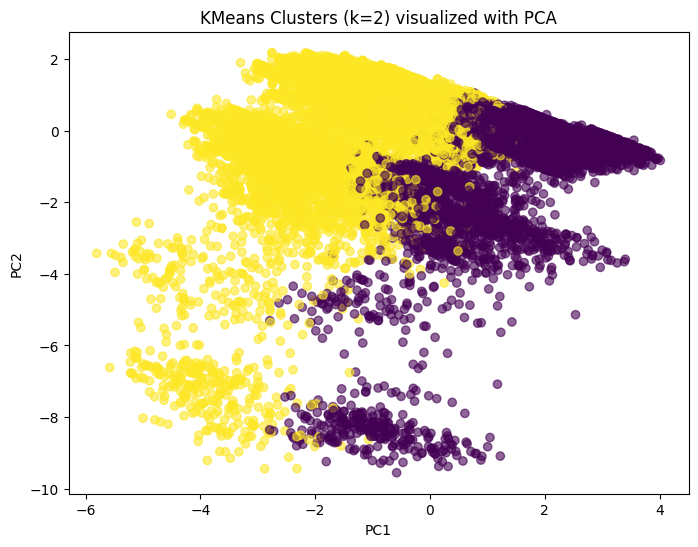

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(data_pca[:,0], data_pca[:,1], c=labels, cmap='viridis', alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"KMeans Clusters (k={best_k}) visualized with PCA")
plt.show()

In [32]:
ct = pd.crosstab(data['cluster'], y)
ct

income,<=50K,<=50K.,>50K,>50K.
cluster,,,,
0,5299,2614,3571,1782
1,9880,5035,475,228


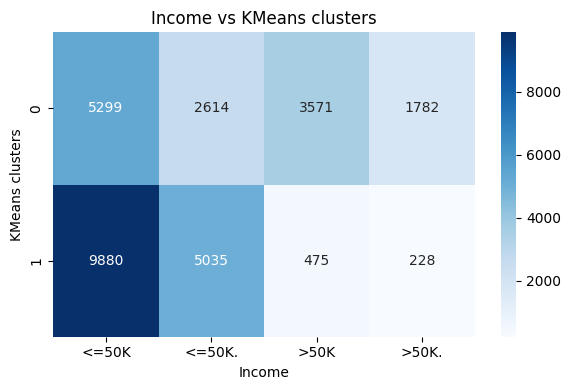

In [33]:
plt.figure(figsize=(6, 4))
sns.heatmap(ct, annot=True, fmt="d", cmap="Blues")
plt.ylabel("KMeans clusters")
plt.xlabel("Income")
plt.title("Income vs KMeans clusters")
plt.tight_layout()
plt.show()


#AgglomerativeClustering

In [34]:
X = np.array(data_scaled)

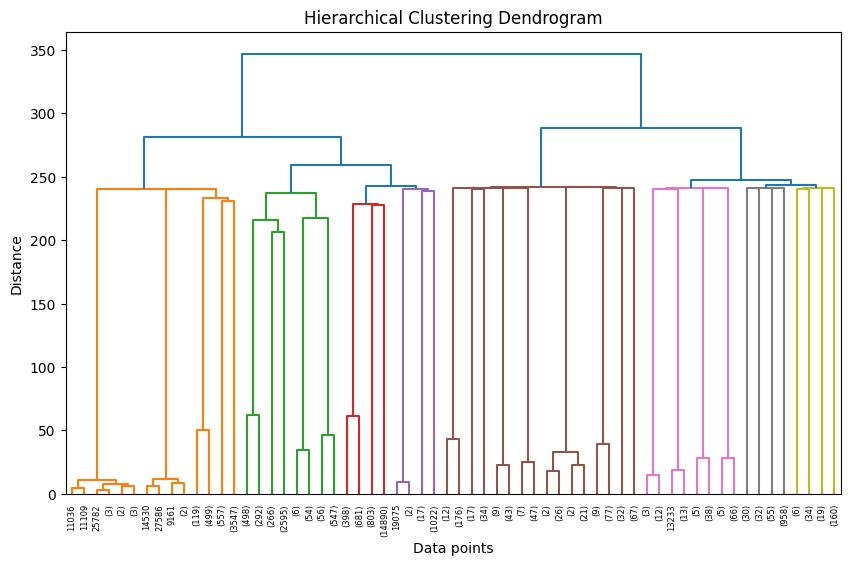

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(data_scaled, method='ward')
plt.figure(figsize=(10,6))
dendrogram(Z, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data points")
plt.ylabel("Distance")
plt.show()

In [36]:
scores = {}
for k in range(2, 11):  # silhouette needs at least 2 clusters
    agg = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = agg.fit_predict(data_pca)  # or X_scaled
    score = silhouette_score(data_pca, labels)
    scores[k] = score
    print(f"k={k}, silhouette score={score:.3f}")

# Best k
best_k = max(scores, key=scores.get)
print("Best number of clusters based on silhouette:", best_k)

k=2, silhouette score=0.624
k=3, silhouette score=0.625
k=4, silhouette score=0.125
k=5, silhouette score=0.115
k=6, silhouette score=0.117
k=7, silhouette score=0.119
k=8, silhouette score=0.120
k=9, silhouette score=0.122
k=10, silhouette score=0.124
Best number of clusters based on silhouette: 3


In [37]:
best_k = 3
agg = AgglomerativeClustering(n_clusters=best_k, linkage='ward')
labels = agg.fit_predict(data_pca)  # or X_scaled

# Add cluster labels to dataset
data['agg_cluster'] = labels

In [38]:
data['agg_cluster']

,agg_cluster
2,0
3,0
4,1
5,0
7,0
...,...
48835,0
48836,0
48837,0
48838,0


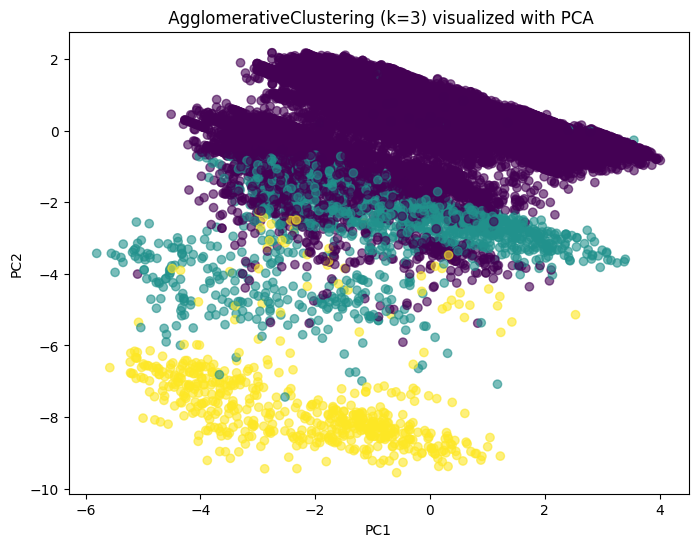

In [39]:
plt.figure(figsize=(8,6))
plt.scatter(data_pca[:,0], data_pca[:,1], c=labels, cmap='viridis', alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f" AgglomerativeClustering (k={best_k}) visualized with PCA")
plt.show()

In [40]:
ct2 = pd.crosstab(data['agg_cluster'], y)
ct2

income,<=50K,<=50K.,>50K,>50K.
agg_cluster,,,,
0,14080,7099,3775,1893
1,811,403,173,69
2,288,147,98,48


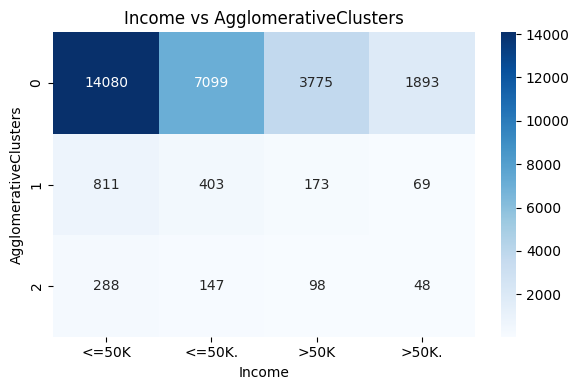

In [41]:
plt.figure(figsize=(6, 4))
sns.heatmap(ct2, annot=True, fmt="d", cmap="Blues")
plt.ylabel("AgglomerativeClusters")
plt.xlabel("Income")
plt.title("Income vs AgglomerativeClusters")
plt.tight_layout()
plt.show()


In [42]:
cluster_profile = data.groupby('agg_cluster').mean(numeric_only=True)
print(cluster_profile)

                   age  education-num  capital-gain  capital-loss  \
agg_cluster                                                         
0            37.946586      10.238164           0.0           0.0   
1            37.184066       9.836538           0.0           0.0   
2            37.385542      11.464716           0.0           0.0   

             hours-per-week   cluster  
agg_cluster                            
0                 41.349946  0.541215  
1                 40.885302  0.549451  
2                 40.820998  0.495697  


In [43]:
categorical_profile = pd.crosstab(data['agg_cluster'], y, normalize='index')
print(categorical_profile)

income          <=50K    <=50K.      >50K     >50K.
agg_cluster                                        
0            0.524453  0.264424  0.140612  0.070511
1            0.557005  0.276786  0.118819  0.047390
2            0.495697  0.253012  0.168675  0.082616
